# Dataset Detail
Dataset has done on 25 subjects (15 males and 10 females). One subject is apprear on 3 session on same MI task. <br>


*   1-31 and 36-64 - EEG electrode = All 60 electrodes
*   32-35          - EOG electrode
*   65-71          - EMG electrode

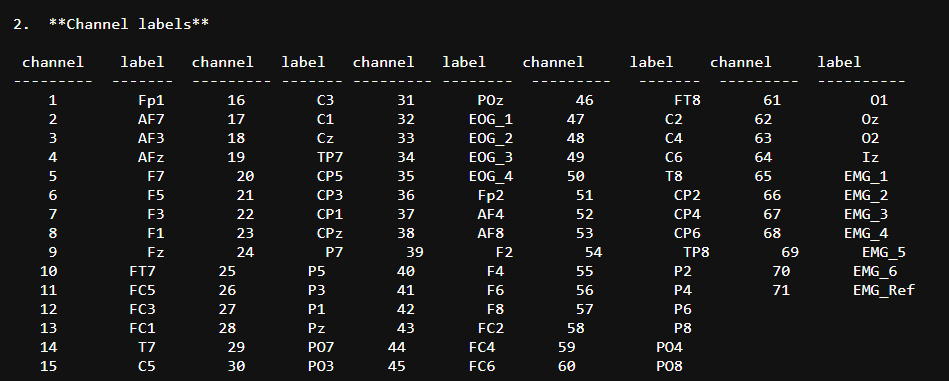

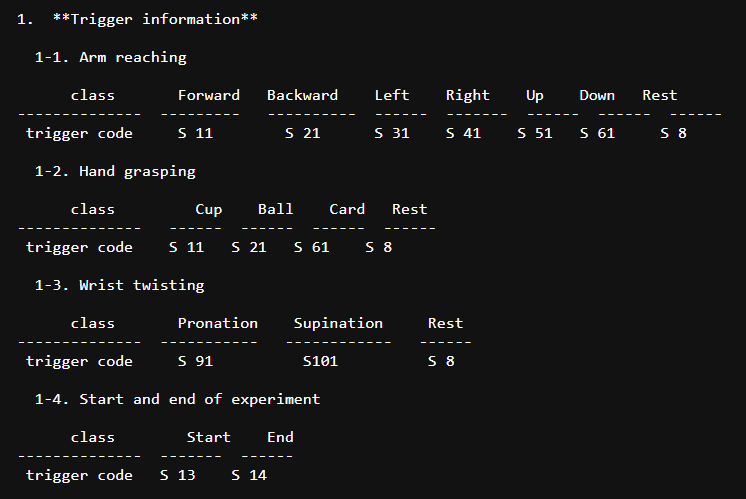

In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 46.9 MB/s eta 0:00:00


In [ ]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mne

In [ ]:
# Connect Google Drive Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
eeg_data = '/content/drive/MyDrive/research/data'
dir = os.listdir(eeg_data)
for file in dir:
  print(file)

session1_sub1_twist_MI.eeg
session1_sub1_twist_MI.vhdr
session1_sub1_twist_MI.vmrk
session2_sub1_twist_MI.vhdr
session2_sub1_twist_MI.vmrk
session2_sub1_twist_MI.eeg
session3_sub1_twist_MI.vhdr
session3_sub1_twist_MI.vmrk


Extracting parameters from /content/drive/MyDrive/research/data/session1_sub1_twist_MI.vhdr...
Setting channel info structure...


<ipython-input-7-c8d2737f7c2d>:2: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
<ipython-input-7-c8d2737f7c2d>:2: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
<ipython-input-7-c8d2737f7c2d>:2: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Reading 0 ... 2605499  =      0.000 ...  1042.200 secs...
Using matplotlib as 2D backend.


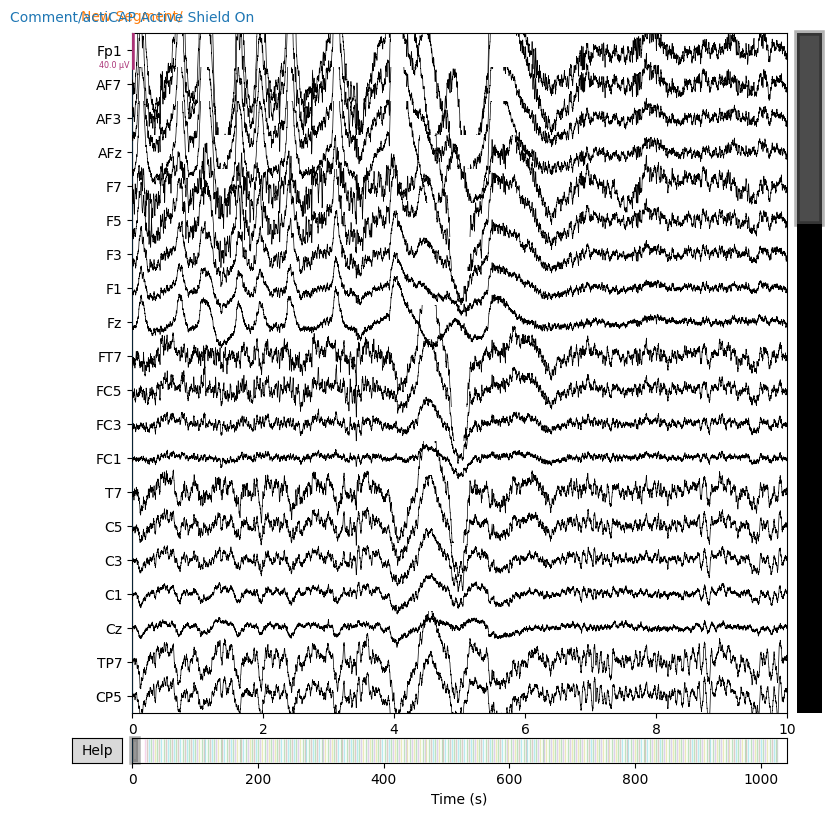

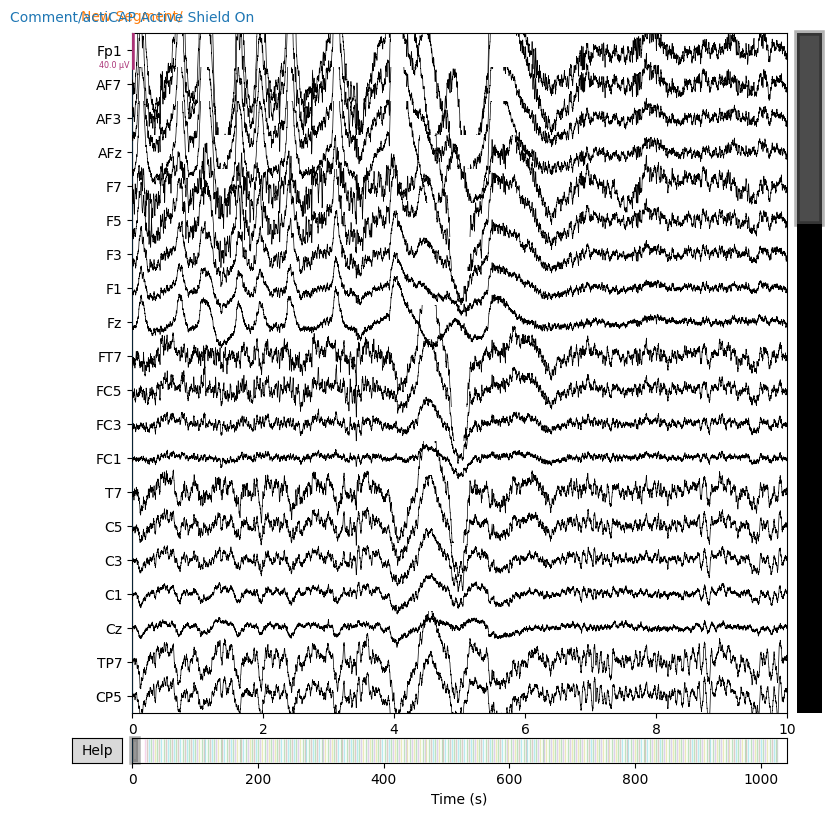

In [ ]:
vhdr_path = eeg_data + '/session1_sub1_twist_MI.vhdr'
raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)

# plot a sample
raw.plot()


In [ ]:
print(raw.ch_names)

['Fp1', 'AF7', 'AF3', 'AFz', 'F7', 'F5', 'F3', 'F1', 'Fz', 'FT7', 'FC5', 'FC3', 'FC1', 'T7', 'C5', 'C3', 'C1', 'Cz', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'P7', 'P5', 'P3', 'P1', 'Pz', 'PO7', 'PO3', 'POz', 'hEOG_L', 'hEOG_R', 'vEOG_U', 'vEOG_D', 'Fp2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'FC2', 'FC4', 'FC6', 'FT8', 'C2', 'C4', 'C6', 'T8', 'CP2', 'CP4', 'CP6', 'TP8', 'P2', 'P4', 'P6', 'P8', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz', 'EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_ref']


In [ ]:
# Remove EOG channels.
EOG = [ch for ch in raw.ch_names if 'EOG' in ch]
print(EOG)
raw.drop_channels(EOG)

['hEOG_L', 'hEOG_R', 'vEOG_U', 'vEOG_D']


<RawBrainVision | session1_sub1_twist_MI.eeg, 67 x 2605500 (1042.2 s), ~1.30 GiB, data loaded>

In [ ]:
# Remove EMG Channels
EMG = [ch for ch in raw.ch_names if 'EMG' in ch]
print(EMG)
raw.drop_channels(EMG)

['EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_ref']


<RawBrainVision | session1_sub1_twist_MI.eeg, 60 x 2605500 (1042.2 s), ~1.16 GiB, data loaded>

In [ ]:
# Apply Band Pass filter to take only alpha beta and gama signals which corresponds to MI task
raw.filter(8., 30., fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    7.5s finished


<RawBrainVision | session1_sub1_twist_MI.eeg, 60 x 2605500 (1042.2 s), ~1.16 GiB, data loaded>

In [ ]:
# Apply ICA
#Artifact Removal via ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=42)
ica.fit(raw)
ica.exclude = [...]  # based on visual or auto EOG detection
raw = ica.apply(raw)

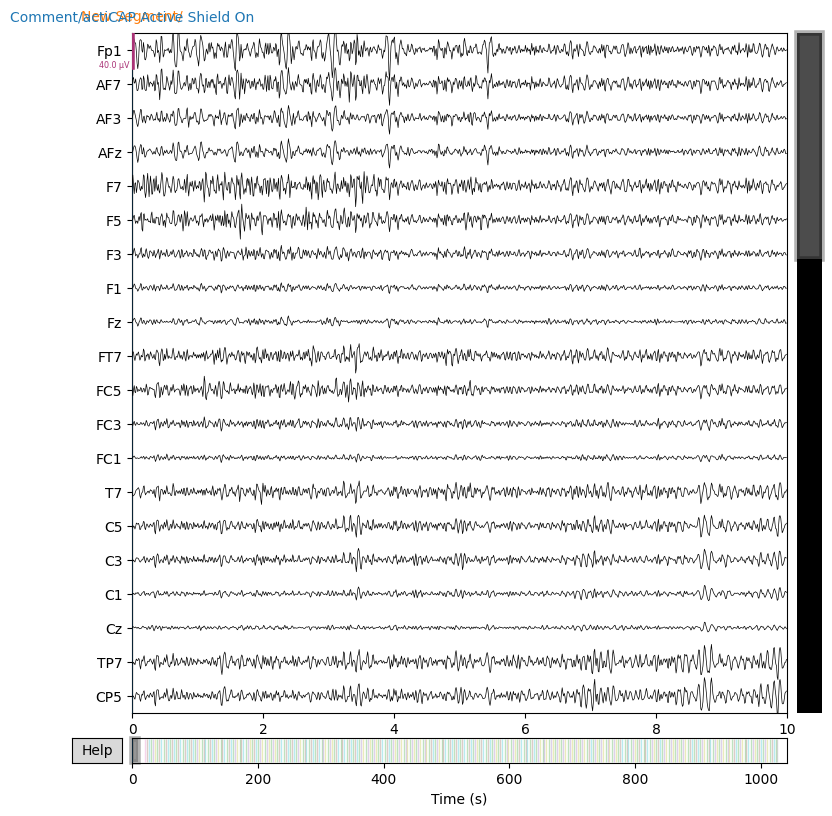

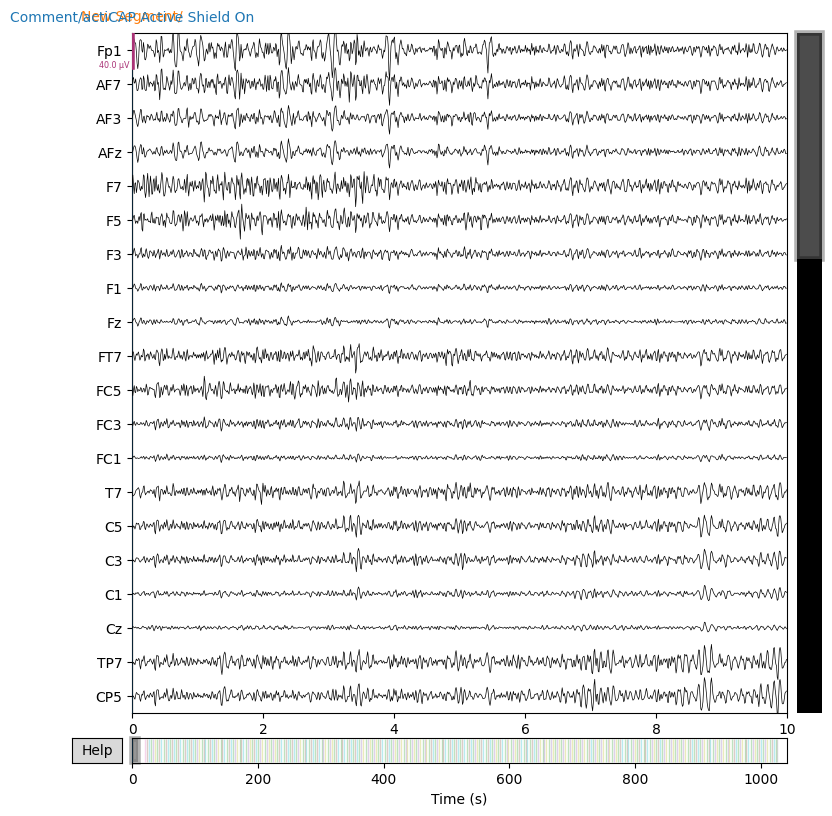

In [ ]:
raw.plot()

## Anotaions of EEG file
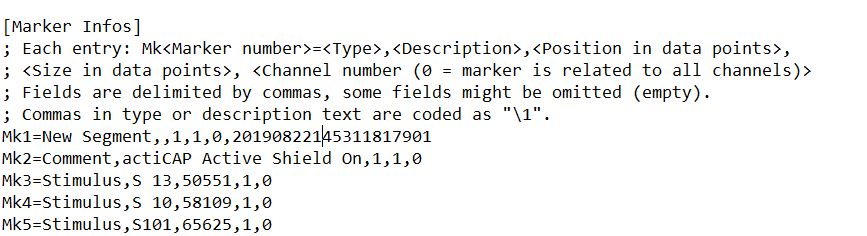
<br>
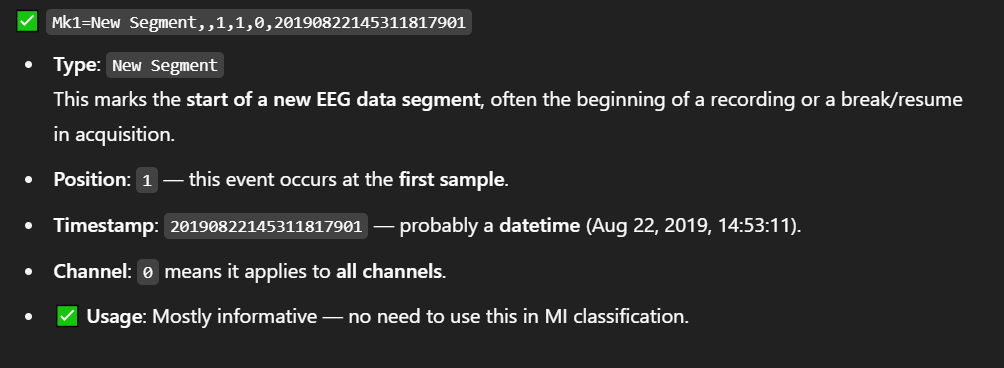
<br>
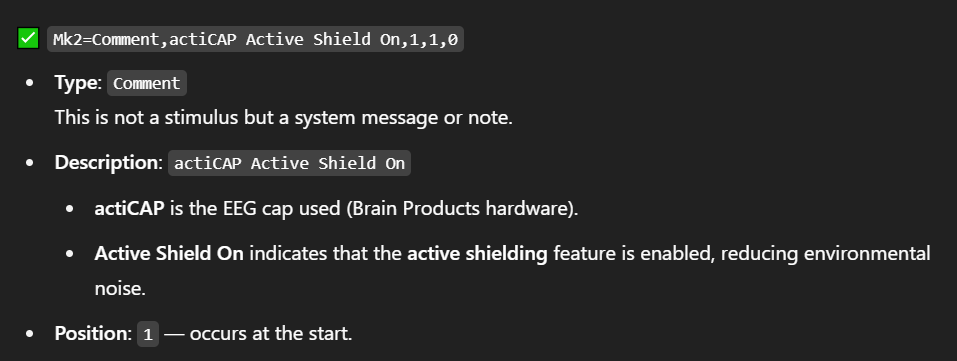

In [ ]:
# Extract annotations (i.e., event labels)
annotations = raw.annotations

# Display all annotations
print(annotations) # 304 - There is 304 events in this file

<Annotations | 304 segments: Comment/actiCAP Active Shield On (1), New ...>


In [ ]:
# Convert annotations to events
events, event_id = mne.events_from_annotations(raw)

# Sample available events
print(event_id)

Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
{np.str_('Comment/actiCAP Active Shield On'): 10001, np.str_('New Segment/'): 99999, np.str_('Stimulus/S  8'): 8, np.str_('Stimulus/S  9'): 9, np.str_('Stimulus/S 10'): 10, np.str_('Stimulus/S 13'): 13, np.str_('Stimulus/S 14'): 14, np.str_('Stimulus/S 91'): 91, np.str_('Stimulus/S101'): 101}


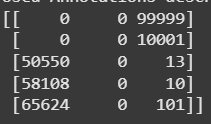
<br>
where 1st column give sample index where the event happened. 2nd column is channel. It is 0 means that event is affected to all EEG electrode. 3rd column gives event code. (check vmrk file manually for further info)

## Extract Pronation and Supination Task

In [ ]:
wrist_events = {'pronation': 91, 'supination': 101}

epochs = mne.Epochs(raw, events, event_id=wrist_events, tmin=-0.2, tmax=2.0,
                    baseline=(None, 0), preload=True)

print(epochs.event_id)


Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 5501 original time points ...
0 bad epochs dropped
{'pronation': 91, 'supination': 101}


In [ ]:
X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
y = epochs.events[:, -1]  # labels: 91 or 101
y = np.array([0 if label == 91 else 1 for label in y])  # 0: pronation, 1: supination

In [ ]:
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Define pipeline
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
lda = LinearDiscriminantAnalysis()
clf = Pipeline([('CSP', csp), ('LDA', lda)])

# Evaluate model
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Classification accuracy: %f (+/- %f)" % (scores.mean(), scores.std()))


Computing rank from data with rank=None
    Using tolerance 0.00027 (2.2e-16 eps * 60 dim * 2e+10  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=91 covariance using EMPIRICAL
Done.
Estimating class=101 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00026 (2.2e-16 eps * 60 dim * 1.9e+10  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=91 covariance using EMPIRICAL
Done.
Estimating class=101 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00026 (2.2e-16 eps * 60 dim * 1.9e+10  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=91 covariance usin

# Intra Subject Variability


In [ ]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mne

In [ ]:
eeg_data = '/content/drive/MyDrive/research/data'
vhdr_paths = [eeg_data + '/session1_sub1_twist_MI.vhdr', eeg_data + '/session2_sub1_twist_MI.vhdr']
wrist_events = {'pronation': 91, 'supination': 101}

def loadData():
  X_all = []
  y_all = []

  for vhdr_path in vhdr_paths:
    raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)

    # Remove EOG channels.
    EOG = [ch for ch in raw.ch_names if 'EOG' in ch]
    raw.drop_channels(EOG)

    # Remove EMG Channels
    EMG = [ch for ch in raw.ch_names if 'EMG' in ch]
    raw.drop_channels(EMG)

    # Apply Band Pass filter to take only alpha beta and gama signals which corresponds to MI task
    raw.filter(8., 30., fir_design='firwin')

    epochs = mne.Epochs(raw, events, event_id=wrist_events, tmin=-0.2, tmax=2.0,
                    baseline=(None, 0), preload=True)

    X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
    y = epochs.events[:, -1]  # labels: 91 or 101
    y = np.array([0 if label == 91 else 1 for label in y])  # 0: pronation, 1: supination

    # Append to lists
    X_all.append(X)
    y_all.append(y)

  # Concatenate all sessions
  X_all = np.concatenate(X_all, axis=0)
  y_all = np.concatenate(y_all, axis=0)

  return X_all, y_all

X, y = loadData()

Extracting parameters from /content/drive/MyDrive/research/data/session1_sub1_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2605499  =      0.000 ...  1042.200 secs...


<ipython-input-37-d93513b82648>:10: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
<ipython-input-37-d93513b82648>:10: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
<ipython-input-37-d93513b82648>:10: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    7.7s finished


Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 5501 original time points ...
0 bad epochs dropped
Extracting parameters from /content/drive/MyDrive/research/data/session2_sub1_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2558099  =      0.000 ...  1023.240 secs...


<ipython-input-37-d93513b82648>:10: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
<ipython-input-37-d93513b82648>:10: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
<ipython-input-37-d93513b82648>:10: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    7.2s finished


Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 5501 original time points ...
0 bad epochs dropped


In [ ]:
print(X.shape, y.shape)

(200, 60, 5501) (200,)


## Train models and Evaluate

### Traditional ML model

In [ ]:
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Define pipeline
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
lda = LinearDiscriminantAnalysis()
clf = Pipeline([('CSP', csp), ('LDA', lda)])

# Evaluate model
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Classification accuracy: %f (+/- %f)" % (scores.mean(), scores.std()))


Computing rank from data with rank=None
    Using tolerance 0.00037 (2.2e-16 eps * 60 dim * 2.8e+10  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00037 (2.2e-16 eps * 60 dim * 2.7e+10  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00036 (2.2e-16 eps * 60 dim * 2.7e+10  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=0 covariance using EMP


--- SVM Evaluation ---
              precision    recall  f1-score   support

           0       0.35      0.30      0.32        20
           1       0.39      0.45      0.42        20

    accuracy                           0.38        40
   macro avg       0.37      0.38      0.37        40
weighted avg       0.37      0.38      0.37        40



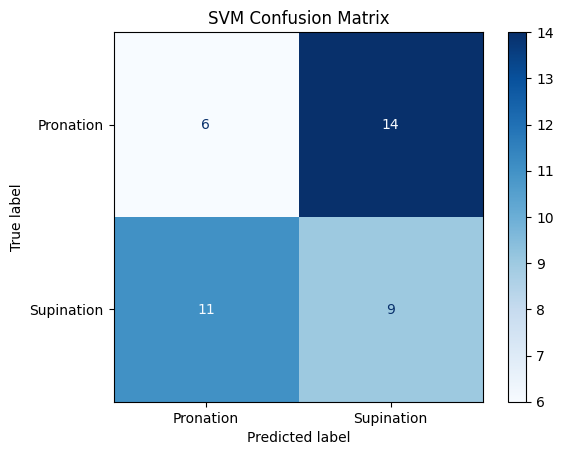


--- RF Evaluation ---
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.50      0.50      0.50        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40



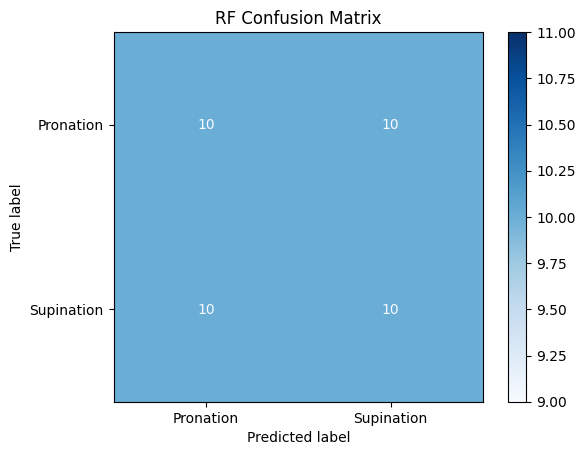

In [ ]:
#latten the EEG data
# Flatten: (n_epochs, n_channels, n_times) → (n_epochs, n_channels * n_times)
X = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "SVM": SVC(kernel='rbf', probability=True),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n--- {name} Evaluation ---")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pronation", "Supination"])
    disp.plot(cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Optimization - Use cross validation for reliable perfomance matrix

### Deep Learning Model

#### RNN

In [ ]:
# Reverse the flaten before run this code
# X, y = loadData()
#Option 2: Deep Learning

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, cross_val_score
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler


# Standardize data
scaler = StandardScaler()
n_epochs, n_channels, n_times = X.shape
X_reshaped = X.reshape(n_epochs, -1)
X_scaled = scaler.fit_transform(X_reshaped).reshape(n_epochs, n_channels, n_times)

# Prepare PyTorch datasets
torch_X = torch.tensor(X_scaled, dtype=torch.float32)
torch_y = torch.tensor(y, dtype=torch.long)
dataset = TensorDataset(torch_X, torch_y)
#dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False)

In [ ]:
# Define RNN model
class EEG_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(EEG_RNN, self).__init__()
        self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # reshape to (batch, time, channels)
        _, h_n = self.rnn(x)
        out = self.fc(h_n[-1])
        return out

In [ ]:
# Train model (generic trainer)
def train_model(model, trainloader, testloader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            outputs = model(batch_X)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(batch_y.numpy())

    print("\n--- Evaluation ---")
    print(classification_report(all_labels, all_preds))
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pronation", "Supination"])
    disp.plot(cmap="Purples")
    plt.title("Deep Learning Model Confusion Matrix")
    plt.show()



Training RNN...
Epoch 1/10, Loss: 7.3653
Epoch 2/10, Loss: 6.8004
Epoch 3/10, Loss: 6.5956
Epoch 4/10, Loss: 6.3544
Epoch 5/10, Loss: 6.1889
Epoch 6/10, Loss: 6.0513
Epoch 7/10, Loss: 5.7963
Epoch 8/10, Loss: 5.6121
Epoch 9/10, Loss: 5.2408
Epoch 10/10, Loss: 4.8631

--- Evaluation ---
              precision    recall  f1-score   support

           0       0.48      0.57      0.52        21
           1       0.40      0.32      0.35        19

    accuracy                           0.45        40
   macro avg       0.44      0.44      0.44        40
weighted avg       0.44      0.45      0.44        40



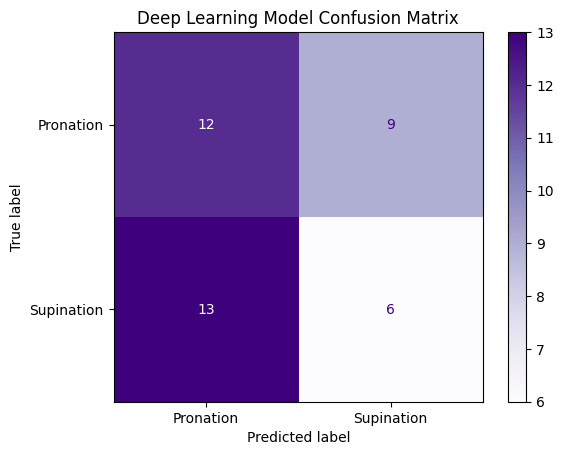

In [ ]:
# Initialize and train models
print("\nTraining RNN...")
rnn_model = EEG_RNN(input_size=n_channels, hidden_size=64, num_classes=2)
train_model(rnn_model, train_loader, test_loader)

#### Transformer

In [ ]:
class EEG_Transformer(nn.Module):
    def __init__(self, input_size, num_classes):
        super(EEG_Transformer, self).__init__()
        self.input_size = input_size
        self.adjusted_dim = input_size if input_size % 4 == 0 else 4 * ((input_size // 4) + 1)
        self.proj = nn.Linear(in_features=self.input_size * n_times, out_features=self.adjusted_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=self.adjusted_dim, nhead=4, batch_first=True)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=2)
        self.fc = nn.Linear(self.adjusted_dim, num_classes)

    def forward(self, x):
        b, c, t = x.size()
        x = x.view(b, -1)
        x = self.proj(x).unsqueeze(1)  # [B, 1, adjusted_dim]
        x = self.transformer(x)
        x = x.mean(dim=1)
        return self.fc(x)

In [ ]:
print("\nTraining Transformer...")
transformer_model = EEG_Transformer(input_size=n_channels, num_classes=2)
train_model(transformer_model, train_loader, test_loader)